In [11]:
import pathlib
import numpy as np
import fitz
import matplotlib.pyplot as plt
import io
from PIL import Image

In [12]:
def display_thetas(thetas_img):
    pdf_document = fitz.open(thetas_img)
    page = pdf_document.load_page(0)
    pix = page.get_pixmap()
    image = Image.open(io.BytesIO(pix.tobytes()))

    plt.figure(figsize=(8, 11))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
mallet_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/theta-evaluation/data/models/trained/mallet_wiki_50"
tomotopy_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/theta-evaluation/data/models/trained/tomotopy_wiki_50"

## Mallet 

In [5]:
with (pathlib.Path(mallet_path) / "tpc_descriptions.txt").open('r', encoding='utf8') as fin:
    tpc_descriptions = [el.strip() for el in fin.readlines()]
    for tpc, keys in enumerate(tpc_descriptions):
        print(f"Topic {tpc}: {keys}")

Topic 0: water area river lake miles park feet island land south years creek mountain north sea
Topic 1: station line railway bridge trains service construction built services train stations opened tunnel london class
Topic 2: ride car train park coaster speed roller track cars riders hill vehicle feet vehicles turn
Topic 3: character story man time life scene death find felt plot people father good end day
Topic 4: war battalion division brigade training regiment units command unit german world military commander japanese service
Topic 5: game player games players released version gameplay video series development release time characters character team
Topic 6: race lap oxford cambridge time car lead place drivers position points team races ahead championship
Topic 7: species shark found long small large body birds females eggs prey sharks males fish water
Topic 8: castle king century england english scotland london henry royal sir lord scottish wales son early
Topic 9: species cap fr

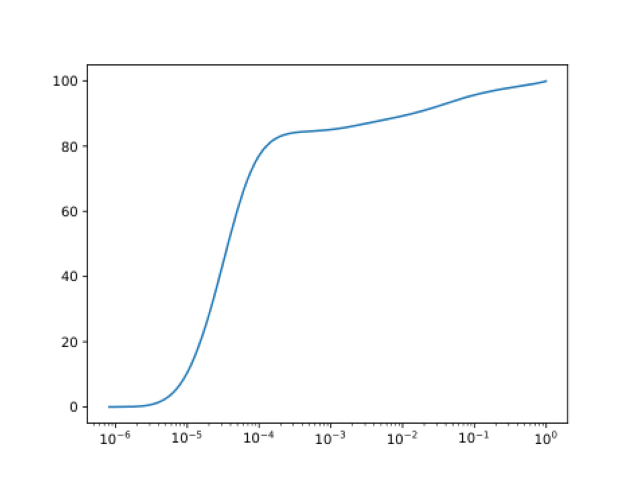

In [13]:
display_thetas((pathlib.Path(mallet_path) / "thetasDist.pdf"))

## Tomotopy

In [6]:
with (pathlib.Path(tomotopy_path) / "tpc_descriptions.txt").open('r', encoding='utf8') as fin:
    tpc_descriptions = [el.strip() for el in fin.readlines()]
    for tpc, keys in enumerate(tpc_descriptions):
        print(f"Topic {tpc}: {keys}")

Topic 0: horse horses jack smith liz tracy frank fey rock jenna riding kenneth year old stud
Topic 1: australia match runs test innings england cricket team wickets scored australian took second matches played
Topic 2: church god christian religious temple christ jesus religion century according faith holy known day text
Topic 3: book published work works wrote poem story writing written art books stories history author novel
Topic 4: ship guns ships tons class long war inch gun mph torpedo knots speed deck main
Topic 5: series released characters story japanese japan original soundtrack music character release comic theme animation manga
Topic 6: station line railway bridge trains service new construction train stations built services opened tunnel rail
Topic 7: season game games home league runs baseball team hit career series run played record year
Topic 8: film films role production million movie release released director cast best character actor filming script
Topic 9: battle bri

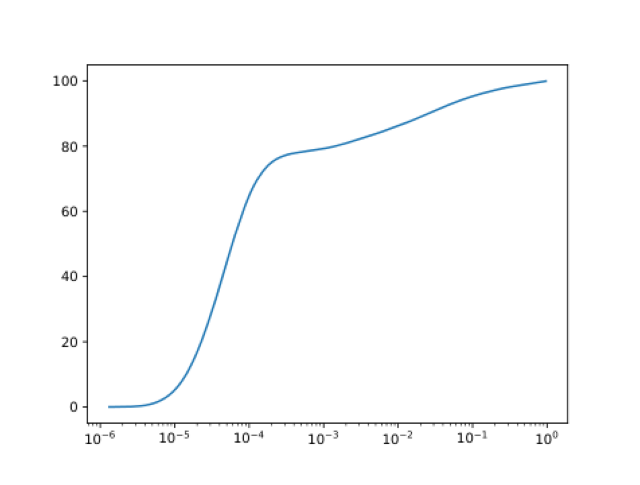

In [14]:
display_thetas((pathlib.Path(tomotopy_path) / "thetasDist.pdf"))